In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns; sns.set()
import chart_studio.plotly as py
import cufflinks as cf
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
cf.go_offline()

import matplotlib.font_manager as fm
path = 'C:\Windows\Fonts\malgunbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools
import time

In [3]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [4]:
with open("Everyone.pickle",'rb') as f:
    Everyone = pickle.load(f)

In [5]:
Everyone.shape

(7422, 13)

In [6]:
# Everyone.to_csv('data/Everyone.csv')

In [9]:
def Check_appname(data,name):
    Temp_data = data[data.장르 == name]
    Temp2 = Temp_data[['app이름','다운로드수','평가점수']]
    return Temp2.sort_values(by = "다운로드수",ascending = False)

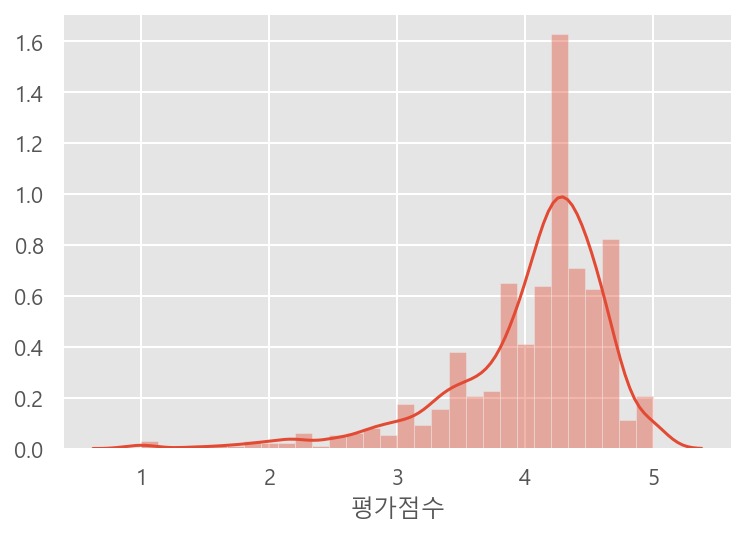

In [12]:
sns.distplot(Check_appname(Everyone,"Tools").평가점수)

In [175]:
Check_appname(Everyone,"Productivity")[3:60]

,app이름,다운로드수
3523,Google Drive,1000000000
3473,Dropbox,500000000
4048,Dropbox,500000000
3934,Microsoft Word,500000000
3574,Cloud Print,500000000
3569,Dropbox,500000000
3562,Google Calendar,500000000
3533,Google Calendar,500000000
3522,Microsoft Word,500000000
3476,Google Calendar,500000000


In [176]:
Check_appname(Everyone,"Entertainment")[6:64]

,app이름,다운로드수
3911,YouTube Kids,50000000
4255,Tom's Love Letters,50000000
3901,Photo Warp,50000000
892,PlayStation App,50000000
879,Talking Ginger 2,50000000
859,YouTube Kids,50000000
2014,YouTube Kids,50000000
2208,YouTube Kids,50000000
9860,Voice changer with effects,50000000
8372,DJ Electro Mix Pad,10000000


In [177]:
Check_appname(Everyone,"Medical")[6:64]

,app이름,다운로드수
2346,Anatomy Learning - 3D Atlas,1000000
2344,Period Tracker,1000000
2338,Drugs.com Medication Guide,1000000
2543,1800 Contacts - Lens Store,1000000
2303,GoodRx Drug Prices and Coupons,1000000
2304,MyChart,1000000
2305,FollowMyHealth®,1000000
2306,CareZone,1000000
2367,mySugr: the blood sugar tracker made just for you,1000000
2307,Ovia Pregnancy Tracker & Baby Countdown Calendar,1000000


In [178]:
Check_appname(Everyone,"Finance")[6:64]

,app이름,다운로드수
1081,İşCep,10000000
1173,Chase Mobile,10000000
4287,K PLUS,10000000
1077,Capital One® Mobile,10000000
1088,Bank of Brazil,10000000
1074,Credit Karma,10000000
1073,Wells Fargo Mobile,10000000
1169,Capital One® Mobile,10000000
1168,Wells Fargo Mobile,10000000
1165,Bank of America Mobile Banking,10000000


In [179]:
Check_appname(Everyone,"Business")[:60]

,app이름,다운로드수
10253,File Commander - File Manager/Explorer,100000000
293,OfficeSuite : Free Office + PDF Editor,100000000
194,OfficeSuite : Free Office + PDF Editor,100000000
4683,"Vault-Hide SMS,Pics & Videos,App Lock,Cloud ba...",50000000
292,Docs To Go™ Free Office Suite,50000000
225,Secure Folder,50000000
10200,Facebook Pages Manager,50000000
201,Facebook Pages Manager,50000000
188,Indeed Job Search,50000000
192,Docs To Go™ Free Office Suite,50000000


In [193]:
from sklearn.metrics import mean_squared_error

In [261]:
Everyone = Everyone.iloc[:,:-2]

In [266]:
feature_columns = list(Everyone.columns.difference(["평가점수"]))

In [267]:
y = Everyone.평가점수

##### Feature추출

In [268]:
def Feature_extracy(data):
    feature_columns = list(data.columns.difference(["평가점수"]))
    data = Everyone[feature_columns]
    data = data.drop(['이용가능연령구분','카테고리','장르'],axis = 1)
    data['app이름길이'] = data.app이름.apply(lambda x : len(x))
    return data

In [269]:
Feature = Everyone[feature_columns]

In [270]:
Feature

,app이름,app크기,가격,다운로드수,리뷰수,마지막업데이트,버전,안드로이드버전,유료구분,이용가능연령구분,장르,카테고리
0,Photo Editor & Candy Camera & Grid & ScrapBook,19M,0.0,10000,159,"January 7, 2018",1.0.0,4.0.3 and up,Free,Everyone,Art & Design,ART_AND_DESIGN
1,Coloring book moana,14M,0.0,500000,967,"January 15, 2018",2.0.0,4.0.3 and up,Free,Everyone,Art & Design,ART_AND_DESIGN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",8.7M,0.0,5000000,87510,"August 1, 2018",1.2.4,4.0.3 and up,Free,Everyone,Art & Design,ART_AND_DESIGN
4,Pixel Draw - Number Art Coloring Book,2.8M,0.0,100000,967,"June 20, 2018",1.1,4.4 and up,Free,Everyone,Art & Design,ART_AND_DESIGN
5,Paper flowers instructions,5.6M,0.0,50000,167,"March 26, 2017",1.0,2.3 and up,Free,Everyone,Art & Design,ART_AND_DESIGN
...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),619k,0.0,1000,44,"March 23, 2014",0.8,2.2 and up,Free,Everyone,Books & Reference,BOOKS_AND_REFERENCE
10834,FR Calculator,2.6M,0.0,500,7,"June 18, 2017",1.0.0,4.1 and up,Free,Everyone,Education,FAMILY
10836,Sya9a Maroc - FR,53M,0.0,5000,38,"July 25, 2017",1.48,4.1 and up,Free,Everyone,Education,FAMILY
10837,Fr. Mike Schmitz Audio Teachings,3.6M,0.0,100,4,"July 6, 2018",1.0,4.1 and up,Free,Everyone,Education,FAMILY


In [271]:
Feature['app이름길이'] = Feature.app이름.apply(lambda x : len(x))

In [272]:
Feature = Feature.drop(['이용가능연령구분','app이름','카테고리','장르'],axis = 1)

In [273]:
Feature

,app크기,가격,다운로드수,리뷰수,마지막업데이트,버전,안드로이드버전,유료구분,app이름길이
0,19M,0.0,10000,159,"January 7, 2018",1.0.0,4.0.3 and up,Free,46
1,14M,0.0,500000,967,"January 15, 2018",2.0.0,4.0.3 and up,Free,19
2,8.7M,0.0,5000000,87510,"August 1, 2018",1.2.4,4.0.3 and up,Free,50
4,2.8M,0.0,100000,967,"June 20, 2018",1.1,4.4 and up,Free,37
5,5.6M,0.0,50000,167,"March 26, 2017",1.0,2.3 and up,Free,26
...,...,...,...,...,...,...,...,...,...
10833,619k,0.0,1000,44,"March 23, 2014",0.8,2.2 and up,Free,11
10834,2.6M,0.0,500,7,"June 18, 2017",1.0.0,4.1 and up,Free,13
10836,53M,0.0,5000,38,"July 25, 2017",1.48,4.1 and up,Free,16
10837,3.6M,0.0,100,4,"July 6, 2018",1.0,4.1 and up,Free,32


In [189]:
x = Feature.다운로드수.value_counts().index

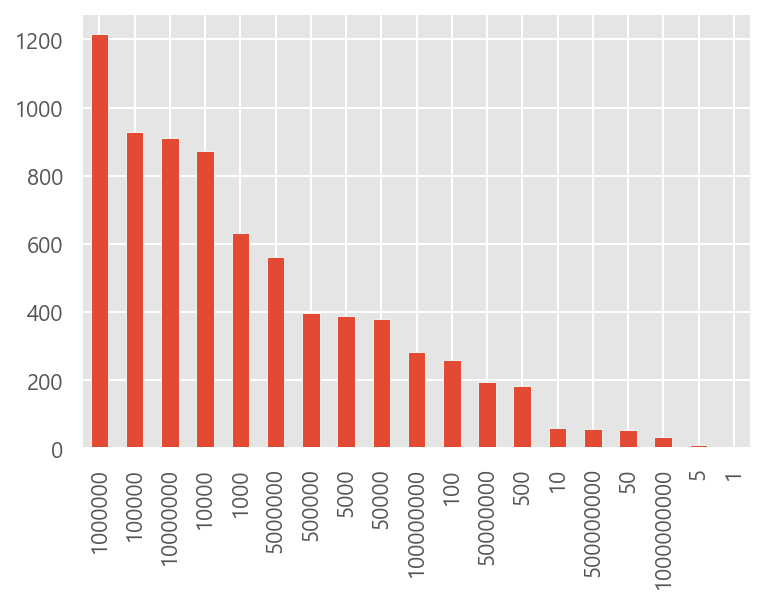

In [190]:
Feature.다운로드수.value_counts().plot(kind = 'bar')

In [274]:
def Appsize(data):
    data.app크기[data.app크기 == "Varies with device"] = "1M"
    Size = data.app크기.unique()
    
    app_size = []
    # M이 있을 경우에 제외하고 x1024, k있을 경우는 그냥 k만 지우자
    for i in Size:
        if i[-1] == "M":
            temp_data = float(i.replace("M",""))
            temp_data *= 1024
            app_size.append(temp_data)
        else:
            temp_data_2 = float(i.replace("k",""))
            app_size.append(temp_data_2)
            
    dict_app = {}
    for i in range(len(Size)):
        dict_app[Size[i]] = app_size[i]
    
    data['app크기'] = data.app크기.apply(lambda x : dict_app[x])
    
    return data

In [247]:
def Check_appname(data,name):
    Temp_data = data[data.장르 == name]
    Temp2 = Temp_data[['app이름','다운로드수']]
    return Temp2.sort_values(by = "다운로드수",ascending = False)

In [275]:
Appsize(Feature)

,app크기,가격,다운로드수,리뷰수,마지막업데이트,버전,안드로이드버전,유료구분,app이름길이
0,19456.0,0.0,10000,159,"January 7, 2018",1.0.0,4.0.3 and up,Free,46
1,14336.0,0.0,500000,967,"January 15, 2018",2.0.0,4.0.3 and up,Free,19
2,8908.8,0.0,5000000,87510,"August 1, 2018",1.2.4,4.0.3 and up,Free,50
4,2867.2,0.0,100000,967,"June 20, 2018",1.1,4.4 and up,Free,37
5,5734.4,0.0,50000,167,"March 26, 2017",1.0,2.3 and up,Free,26
...,...,...,...,...,...,...,...,...,...
10833,619.0,0.0,1000,44,"March 23, 2014",0.8,2.2 and up,Free,11
10834,2662.4,0.0,500,7,"June 18, 2017",1.0.0,4.1 and up,Free,13
10836,54272.0,0.0,5000,38,"July 25, 2017",1.48,4.1 and up,Free,16
10837,3686.4,0.0,100,4,"July 6, 2018",1.0,4.1 and up,Free,32


In [249]:
def Version_adj(data):
    Month_dict = {"January" : 1, 'February' : 2, 'March' : 3, 'April' : 4, 'May' : 5,'June':6,'July' : 7,'August' : 8,'September' : 9,'October' : 10, "November" : 11, "December" : 12  }
    Month = data.마지막업데이트.str.split(' ').str[0]
    Month_data = Month.apply(lambda x : Month_dict[x])
    BBB = data.마지막업데이트.str.split(' ').str[1:]
    Day = BBB.str[0].apply(lambda x : int(x.replace(',','')))
    Year = BBB.str[1].apply(lambda x : int(x))
    return Month, Day, Year

In [250]:
def Update_version(data,Month,Day,Year):
    data = data.drop(['마지막업데이트'],axis = 1)
    data['업데이트_월'] = Month
    data['업데이트_일'] = Day
    data['업데이트_연도'] = Year
    return data

In [276]:
Month,Day,Year = Version_adj(Feature)

In [278]:
Feature = Update_version(Feature,Month,Day,Year)

AttributeError: 'DataFrame' object has no attribute '업데이트_월'

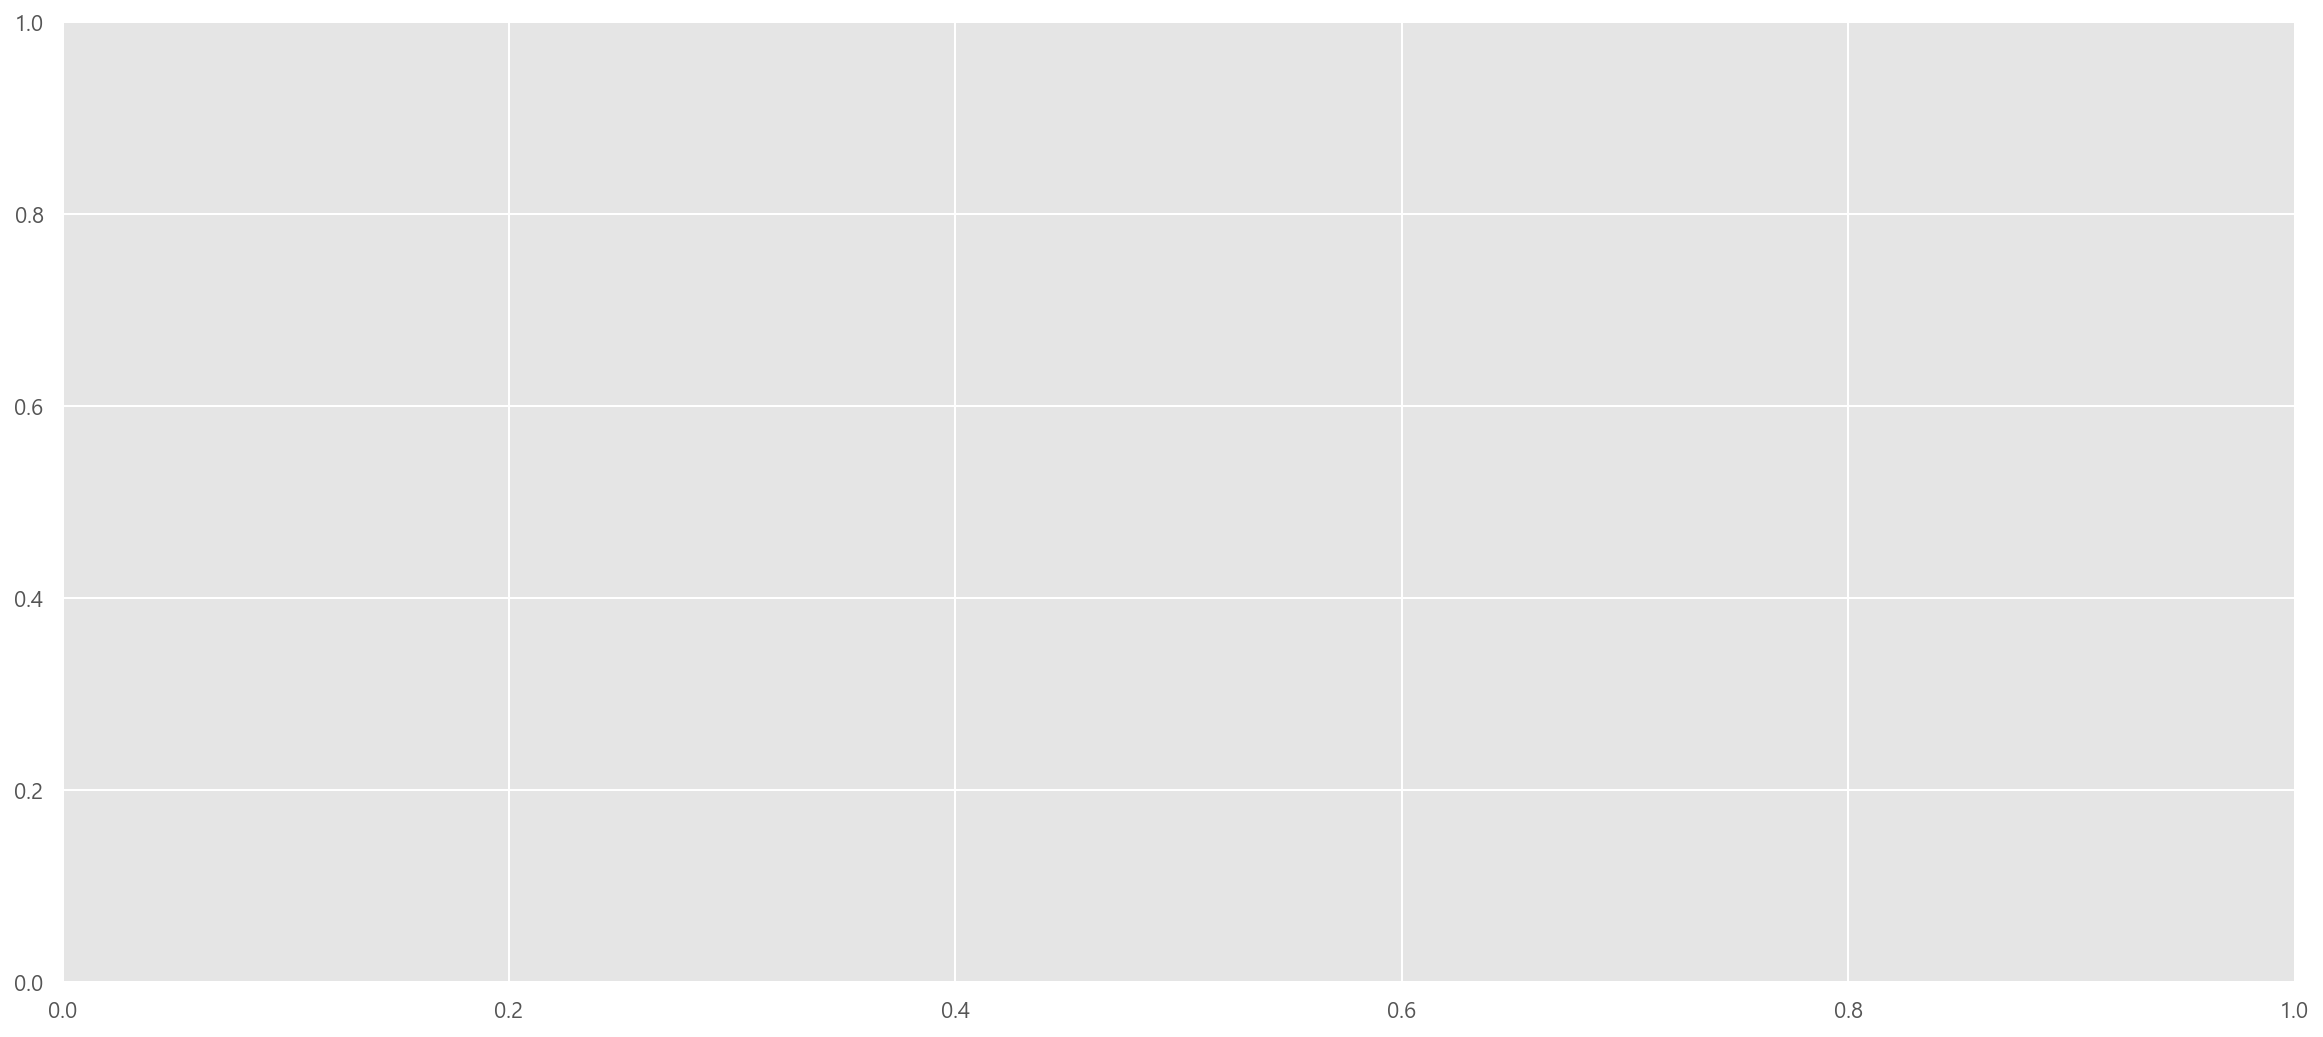

In [253]:
plt.figure(figsize  = (20,30))
plt.subplot(3,1,1)
sns.regplot(Feature.업데이트_월,y)

plt.subplot(3,1,2)
sns.regplot(Feature.업데이트_일,y)

plt.subplot(3,1,3)
sns.regplot(Feature.업데이트_연도,y)

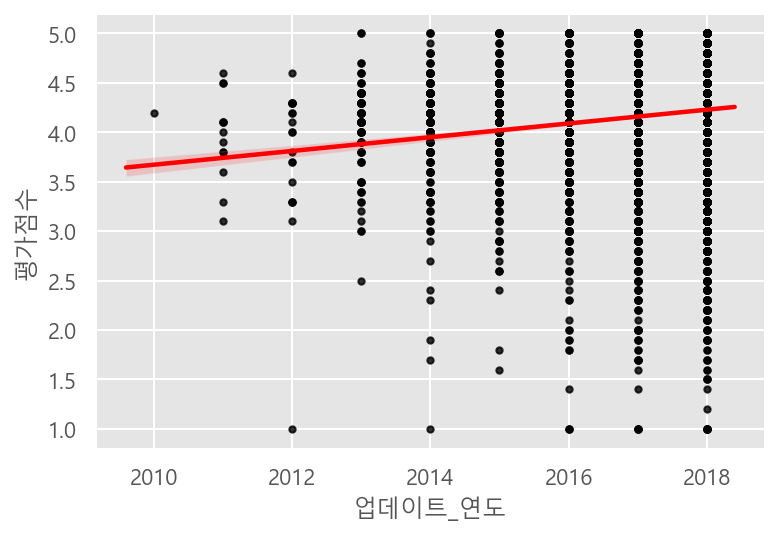

In [231]:
sns.regplot(Feature.업데이트_연도,y,scatter_kws = {'color' : 'black','s':10},line_kws={'color':'red'})

In [233]:
def Graph(data):
    plt.figure(figsize = (20,40))
    plt.subplot(5,1,1)
    sns.regplot(data.app크기,y,scatter_kws = {'color' : 'black','s':10},line_kws={'color':'red'})
    plt.subplot(5,1,2)
    sns.regplot(data.리_다,y,scatter_kws = {'color' : 'black','s':10},line_kws={'color':'red'})
    plt.subplot(5,1,3)
    sns.regplot(data.app이름길이,y,scatter_kws = {'color' : 'black','s':10},line_kws={'color':'red'})
    plt.subplot(5,1,4)
    sns.regplot(data.가격,y,scatter_kws = {'color' : 'black','s':10},line_kws={'color':'red'})
    plt.subplot(5,1,5)
    sns.regplot(data.업데이트_연도,y,scatter_kws = {'color' : 'black','s':10},line_kws={'color':'red'})

AttributeError: 'DataFrame' object has no attribute '리_다'

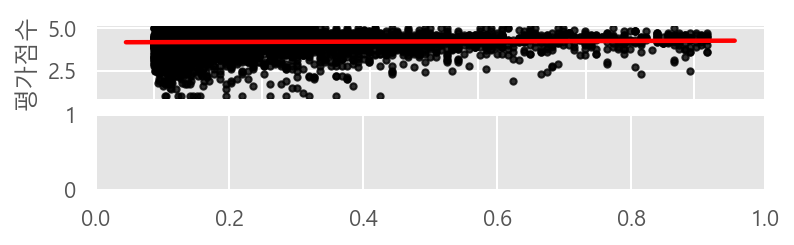

In [236]:
Graph(Feature)

In [254]:
y

0        4.1
1        3.9
2        4.7
4        4.3
5        4.4
        ... 
10833    4.8
10834    4.0
10836    4.5
10837    5.0
10840    4.5
Name: 평가점수, Length: 7422, dtype: float64

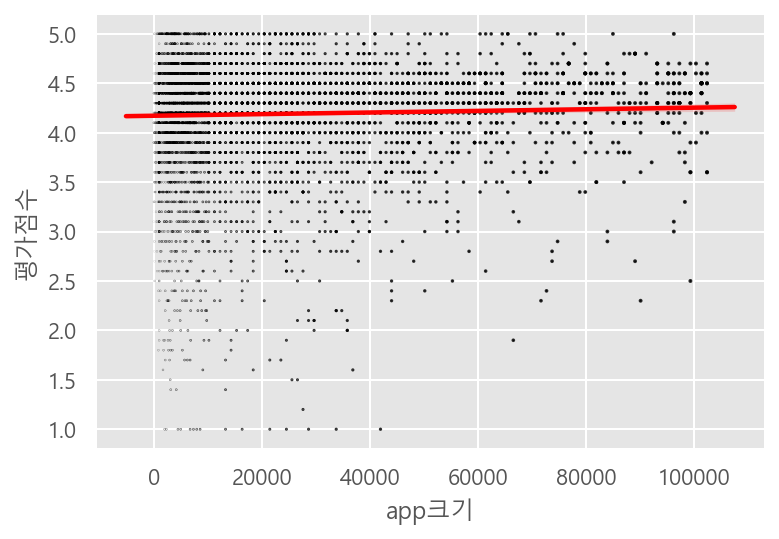

In [223]:
sns.regplot(Feature.app크기,y,scatter_kws = {'color' : 'black','s':Feature.app크기*0.00001},line_kws={'color':'red'})

In [213]:
Feature = Feature.drop(['업데이트_월','업데이트_일'],axis = 1)

In [280]:
Feature = Feature.drop(['버전','안드로이드버전','유료구분','업데이트_월','업데이트_일'],axis = 1)

In [33]:
Test = Feature[['가격','유료구분']]

In [34]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2):
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

In [35]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in Test.columns:
    data_encoded[i]=label.fit_transform(Test[i])

In [36]:
rows= []

for var1 in data_encoded:
    col = []
    for var2 in data_encoded :
        cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)
df

,가격,유료구분
가격,1.0,1.0
유료구분,1.0,1.0


완벽한 상관관계.. 따라서 하나 지우자

In [37]:
Feature = Feature.drop('유료구분',axis = 1)

In [281]:
Feature

,app크기,가격,다운로드수,리뷰수,app이름길이,업데이트_연도
0,19456.0,0.0,10000,159,46,2018
1,14336.0,0.0,500000,967,19,2018
2,8908.8,0.0,5000000,87510,50,2018
4,2867.2,0.0,100000,967,37,2018
5,5734.4,0.0,50000,167,26,2017
...,...,...,...,...,...,...
10833,619.0,0.0,1000,44,11,2014
10834,2662.4,0.0,500,7,13,2017
10836,54272.0,0.0,5000,38,16,2017
10837,3686.4,0.0,100,4,32,2018


In [282]:
def Change(data):
    data.리뷰수 = data.리뷰수.apply(lambda x: int(x))
    data['리_다'] = data.리뷰수 / data.다운로드수
    data= data.drop(['리뷰수','다운로드수'],axis = 1)
    return data

In [284]:
Feature = Change(Feature)

In [285]:
Feature

,app크기,가격,app이름길이,업데이트_연도,리_다
0,19456.0,0.0,46,2018,0.015900
1,14336.0,0.0,19,2018,0.001934
2,8908.8,0.0,50,2018,0.017502
4,2867.2,0.0,37,2018,0.009670
5,5734.4,0.0,26,2017,0.003340
...,...,...,...,...,...
10833,619.0,0.0,11,2014,0.044000
10834,2662.4,0.0,13,2017,0.014000
10836,54272.0,0.0,16,2017,0.007600
10837,3686.4,0.0,32,2018,0.040000


In [39]:
def Down_adj(data):
    data.다운로드수 = data.다운로드수.apply(lambda x : x.replace("+",""))
    data.다운로드수 = data.다운로드수.apply(lambda x : x.replace(",",""))
    data.다운로드수 = data.다운로드수.apply(lambda x : x.replace(",",""))
    data.다운로드수 = data.다운로드수.apply(lambda x : int(x))
    return data

In [40]:
# 범주형임에도 불구하고 리뷰수와 비율을 따지기 위해 int형으로 변환
Feature.다운로드수 = Feature.다운로드수.apply(lambda x : int(x))

In [41]:
Feature.리뷰수 = Feature.리뷰수.apply(lambda x : int(x))

In [42]:
TTT = Feature.리뷰수/Feature.다운로드수

In [43]:
adj_TTT = (TTT-min(TTT)) / (max(TTT) - min(TTT))

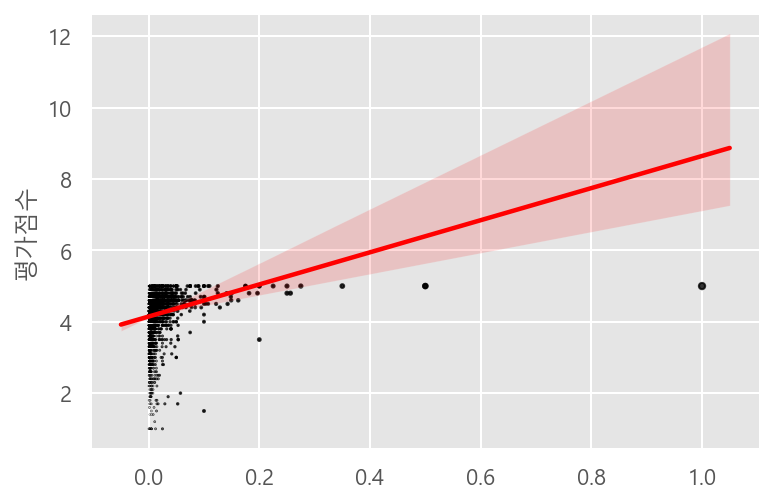

In [217]:
sns.regplot(adj_TTT,y,scatter_kws = {'color' : 'black','s' : adj_TTT*10},line_kws={'color':'red'})

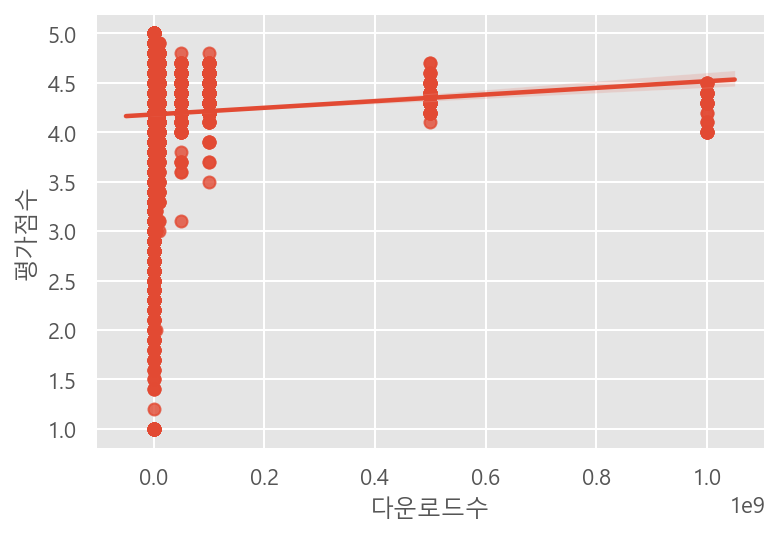

In [45]:
sns.regplot(Feature.다운로드수,y)

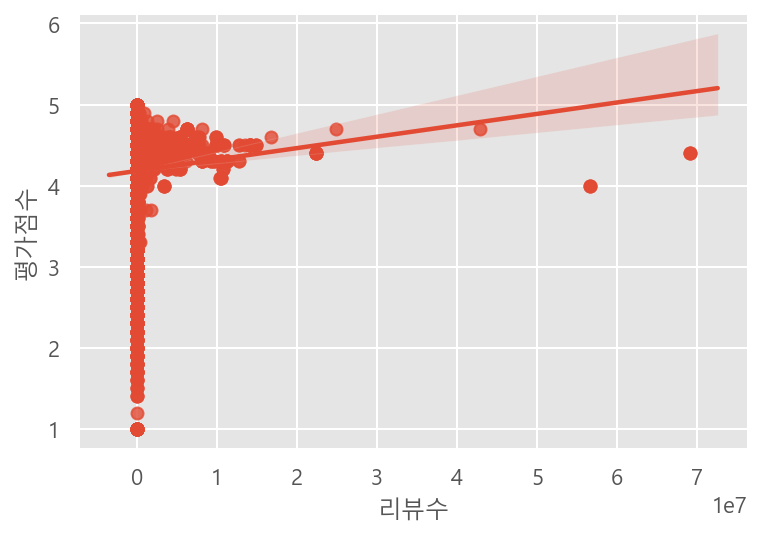

In [46]:
sns.regplot(Feature.리뷰수,y)

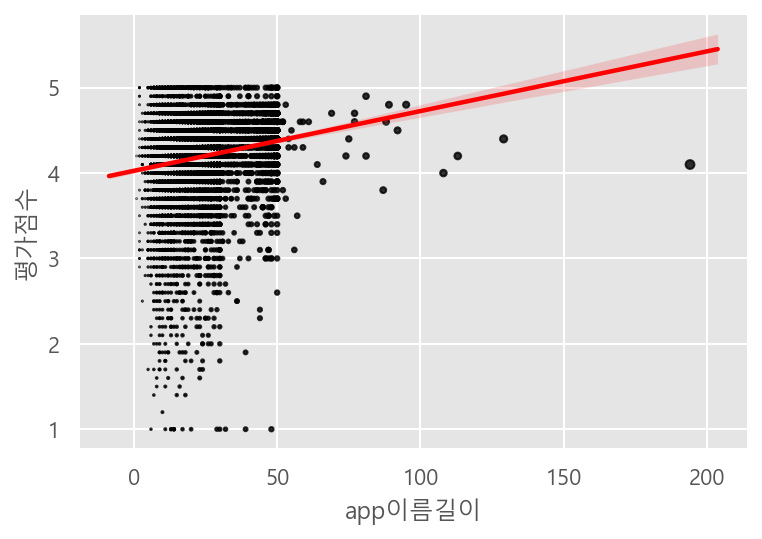

In [219]:
sns.regplot(Feature.app이름길이,y,scatter_kws = {'color' : 'black','s' : Feature.app이름길이 * 0.1},line_kws={'color':'red'})

In [48]:
Feature.corr()

,app크기,가격,다운로드수,리뷰수,app이름길이,업데이트_연도
app크기,1.000000,-0.013478,-0.010408,0.050587,0.004493,0.153228
가격,-0.013478,1.000000,-0.011934,-0.010137,-0.028896,0.002334
다운로드수,-0.010408,-0.011934,1.000000,0.638069,-0.034894,0.090542
리뷰수,0.050587,-0.010137,0.638069,1.000000,0.007516,0.078326
app이름길이,0.004493,-0.028896,-0.034894,0.007516,1.000000,0.150034
업데이트_연도,0.153228,0.002334,0.090542,0.078326,0.150034,1.000000


단순 회귀분석 시작

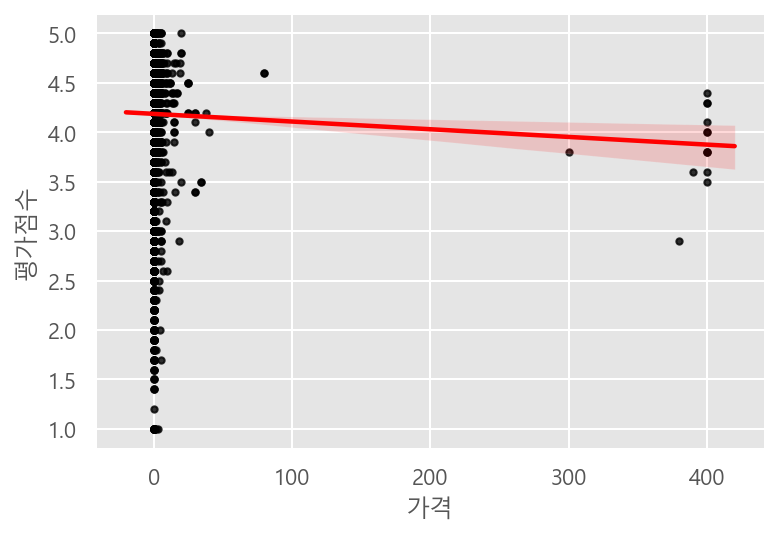

In [229]:
sns.regplot(Feature.가격,y,scatter_kws = {'color' : 'black','s' :10},line_kws={'color':'red'})

In [49]:
Feature2 = Feature

In [50]:
Feature2 = Feature2.drop(['다운로드수','리뷰수'],axis = 1)

In [51]:
Feature2['리_다'] = TTT

In [52]:
Feature

,app크기,가격,다운로드수,리뷰수,app이름길이,업데이트_연도
0,19456.0,0.0,10000,159,46,2018
1,14336.0,0.0,500000,967,19,2018
2,8908.8,0.0,5000000,87510,50,2018
4,2867.2,0.0,100000,967,37,2018
5,5734.4,0.0,50000,167,26,2017
...,...,...,...,...,...,...
10833,619.0,0.0,1000,44,11,2014
10834,2662.4,0.0,500,7,13,2017
10836,54272.0,0.0,5000,38,16,2017
10837,3686.4,0.0,100,4,32,2018


In [53]:
Feature2

,app크기,가격,app이름길이,업데이트_연도,리_다
0,19456.0,0.0,46,2018,0.015900
1,14336.0,0.0,19,2018,0.001934
2,8908.8,0.0,50,2018,0.017502
4,2867.2,0.0,37,2018,0.009670
5,5734.4,0.0,26,2017,0.003340
...,...,...,...,...,...
10833,619.0,0.0,11,2014,0.044000
10834,2662.4,0.0,13,2017,0.014000
10836,54272.0,0.0,16,2017,0.007600
10837,3686.4,0.0,32,2018,0.040000


In [54]:
Feature.corr()

,app크기,가격,다운로드수,리뷰수,app이름길이,업데이트_연도
app크기,1.000000,-0.013478,-0.010408,0.050587,0.004493,0.153228
가격,-0.013478,1.000000,-0.011934,-0.010137,-0.028896,0.002334
다운로드수,-0.010408,-0.011934,1.000000,0.638069,-0.034894,0.090542
리뷰수,0.050587,-0.010137,0.638069,1.000000,0.007516,0.078326
app이름길이,0.004493,-0.028896,-0.034894,0.007516,1.000000,0.150034
업데이트_연도,0.153228,0.002334,0.090542,0.078326,0.150034,1.000000


In [55]:
Feature2.corr()

,app크기,가격,app이름길이,업데이트_연도,리_다
app크기,1.000000,-0.013478,0.004493,0.153228,0.018211
가격,-0.013478,1.000000,-0.028896,0.002334,0.023187
app이름길이,0.004493,-0.028896,1.000000,0.150034,-0.040819
업데이트_연도,0.153228,0.002334,0.150034,1.000000,0.004428
리_다,0.018211,0.023187,-0.040819,0.004428,1.000000


분석 시작

In [288]:
from sklearn.model_selection import KFold

In [286]:
Feature = sm.add_constant(Feature,has_constant='add')

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [287]:
Feature

,const,app크기,가격,app이름길이,업데이트_연도,리_다
0,1.0,19456.0,0.0,46,2018,0.015900
1,1.0,14336.0,0.0,19,2018,0.001934
2,1.0,8908.8,0.0,50,2018,0.017502
4,1.0,2867.2,0.0,37,2018,0.009670
5,1.0,5734.4,0.0,26,2017,0.003340
...,...,...,...,...,...,...
10833,1.0,619.0,0.0,11,2014,0.044000
10834,1.0,2662.4,0.0,13,2017,0.014000
10836,1.0,54272.0,0.0,16,2017,0.007600
10837,1.0,3686.4,0.0,32,2018,0.040000


In [289]:
cv = KFold(4)
score_list = []
for i, (idx_train,idx_test) in enumerate(cv.split(Feature)):
    train_x = Feature.iloc[idx_train]
    train_y = y.reset_index().iloc[idx_train].set_index('index')
    test_x = Feature.iloc[idx_test]
    test_y = y.reset_index().iloc[idx_test].set_index('index')
    model = sm.OLS(train_y,train_x)
    fitted_model = model.fit()
    print(fitted_model.summary())
    predict = fitted_model.predict(test_x)
    score_list.append(mean_squared_error(test_y,predict))

                            OLS Regression Results                            
Dep. Variable:                   평가점수   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     92.79
Date:                Mon, 15 Jun 2020   Prob (F-statistic):           4.13e-94
Time:                        22:58:33   Log-Likelihood:                -4649.4
No. Observations:                5566   AIC:                             9311.
Df Residuals:                    5560   BIC:                             9350.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -95.1743     12.911     -7.371      0.0

In [296]:
np.array(score_list).mean()

0.27449968550381976

In [77]:
Result = []

In [292]:
Feature = Feature.drop(['app크기','가격'],axis = 1)

In [293]:
Feature

,const,app이름길이,업데이트_연도,리_다
0,1.0,46,2018,0.015900
1,1.0,19,2018,0.001934
2,1.0,50,2018,0.017502
4,1.0,37,2018,0.009670
5,1.0,26,2017,0.003340
...,...,...,...,...
10833,1.0,11,2014,0.044000
10834,1.0,13,2017,0.014000
10836,1.0,16,2017,0.007600
10837,1.0,32,2018,0.040000


In [294]:
cv = KFold(4)
score_list2 = []
for i, (idx_train,idx_test) in enumerate(cv.split(Feature)):
    train_x = Feature.iloc[idx_train]
    train_y = y.reset_index().iloc[idx_train].set_index('index')
    test_x = Feature.iloc[idx_test]
    test_y = y.reset_index().iloc[idx_test].set_index('index')
    model2 = sm.OLS(train_y,train_x)
    fitted_model2 = model2.fit()
    print(fitted_model2.summary())
    predict = fitted_model2.predict(test_x)
    score_list2.append(mean_squared_error(test_y,predict))

                            OLS Regression Results                            
Dep. Variable:                   평가점수   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     153.0
Date:                Tue, 16 Jun 2020   Prob (F-statistic):           2.68e-95
Time:                        00:58:52   Log-Likelihood:                -4651.7
No. Observations:                5566   AIC:                             9311.
Df Residuals:                    5562   BIC:                             9338.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -92.6997     12.751     -7.270      0.0

In [295]:
np.array(score_list2).mean()

0.27411324761274397

# Test적용시켜보자

In [90]:
with open('Everyone_Test.pickle','rb') as f:
    Everyone_Test = pickle.load(f)

In [91]:
Everyone_Test

,리뷰수,app크기,다운로드수,가격,장르,app이름길이,업데이트_월,업데이트_일,업데이트_연도
23,61,7168.0,100000,0.0,Art & Design,22,3,7,2018
123,119,3788.8,50000,0.0,Beauty,22,7,23,2018
163,161,2764.8,10000,0.0,Books & Reference,26,7,13,2018
180,2,7372.8,50000,0.0,Books & Reference,35,6,15,2018
185,114,7475.2,100000,0.0,Books & Reference,30,8,7,2015
...,...,...,...,...,...,...,...,...,...
10823,1,2969.6,100,0.0,Video Players & Editors,12,4,22,2018
10824,67,83968.0,10000,0.0,Medical,9,7,31,2018
10831,38,10035.2,5000,0.0,Maps & Navigation,24,6,13,2018
10835,0,9830.4,10,0.0,Business,8,9,29,2016


In [92]:
Everyone_Test =Everyone_Test.drop(['app크기','장르','업데이트_월','업데이트_일'],axis = 1)

In [93]:
Everyone_Test.리뷰수 = Everyone_Test.리뷰수.apply(lambda x : int(x))

In [94]:
def Plus_F(data):
    data['리_다'] = data.리뷰수/ data.다운로드수
    data = data.drop(['다운로드수','리뷰수'],axis = 1)
    return data

In [95]:
Everyone_Test = Plus_F(Everyone_Test)

In [96]:
Everyone_Test

,가격,app이름길이,업데이트_연도,리_다
23,0.0,22,2018,0.00061
123,0.0,22,2018,0.00238
163,0.0,26,2018,0.01610
180,0.0,35,2018,0.00004
185,0.0,30,2015,0.00114
...,...,...,...,...
10823,0.0,12,2018,0.01000
10824,0.0,9,2018,0.00670
10831,0.0,24,2018,0.00760
10835,0.0,8,2016,0.00000


In [97]:
Everyone_Test = sm.add_constant(Everyone_Test,has_constant='add')

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [98]:
Result_Test_Rating = fitted_model.predict(Everyone_Test)

In [298]:
Result_Test_Rating.describe()

count    1283.000000
mean        4.154899
std         0.195362
min         3.774259
25%         4.081447
50%         4.130834
75%         4.197158
max         8.322378
dtype: float64

In [301]:
Result_Test_Rating[Result_Test_Rating > 5].shape

(12,)

In [ ]:
with open('Everyone_result.pickle','wb') as f:
    pickle.dump(Result_Test_Rating,f)